**Trabalhando com Planilhas do Excel**

In [2]:
#Iportado Biblioteca
import pandas as pd

In [ ]:
#Leitura dos arquivos

In [3]:
df1 = pd.read_excel("/content/drive/MyDrive/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/datasets/Fortaleza.xlsx")

In [4]:
df3 = pd.read_excel("/content/drive/MyDrive/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/datasets/Salvador.xlsx")

In [5]:
df2.head(5        )

,Cidade,Data,Vendas,LojaID,Qtde
0,Fortaleza,2019-01-01,45.27,1002.0,2.0
1,Fortaleza,2019-01-01,115.61,1002.0,3.0
2,Fortaleza,2019-02-10,35.33,1004.0,3.0
3,Fortaleza,2019-02-10,20.95,1004.0,6.0
4,Fortaleza,2019-01-01,14.25,1004.0,6.0


In [ ]:
#Juntando todos os arquivos

In [ ]:
df=pd.concat([df1,df2,df3,df4,df5])

In [ ]:
#Exibindo
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#Alterando o tipo de dados da coluna LojaID
df["LojaID"]=df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
df.sample(7)

,Cidade,Data,Vendas,LojaID,Qtde
175,Salvador,2019-01-02,16.53,1036,2
75,Fortaleza,2019-01-01,19.99,1005,4
20,Aracaju,2018-01-01,39.86,1522,9
113,Recife,2019-03-02,38.63,980,2
120,Natal,2019-01-02,140.17,1036,2
123,Salvador,2019-03-02,127.45,1036,3
94,Natal,2019-01-02,33.24,1037,1


In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


*Testando Valores Faltantes*

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [ ]:
df["Vendas"].mean() 


122.61180089485458

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [ ]:
#Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [ ]:
df.dropna(how="all", inplace=True)


*Criando Colunas Novas*

In [ ]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"] 

In [ ]:
#Retorno da Maior Receita

In [ ]:
df["Receita"].max()

3544.0

In [ ]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [ ]:
#nlargest - Top 3 com Base na Consulta Receita
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [ ]:
#nsamllest - As 3 Piores Receitas
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [ ]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


# **Trabalhando com Datas**

In [ ]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [ ]:
#Trasnformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [ ]:
#Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0
...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,1.0
236,Salvador,2019-01-03,126.29,1035,3,378.87,3.0
237,Salvador,2019-01-03,38.06,1036,3,114.18,3.0
238,Salvador,2019-01-03,139.64,1035,1,139.64,1.0


In [ ]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()


Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Criando uma nova coluna com o ANO
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
#Extraindo o mês e o dia da Data
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
39,Fortaleza,2019-01-01,176.51,1005,1,176.51,1.0,2019,1,1
77,Natal,2019-04-01,426.00,853,3,1278.00,3.0,2019,4,1
60,Recife,2019-01-01,37.97,983,1,37.97,1.0,2019,1,1
58,Aracaju,2018-01-01,37.14,1520,7,259.98,7.0,2018,1,1
53,Natal,2019-02-14,290.00,854,4,1160.00,4.0,2019,2,14


In [ ]:
#Retorna a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [ ]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,trimestre_venda
118,Fortaleza,2019-03-02,17.70,981,5,88.50,5.0,2019,3,2,1
113,Recife,2019-03-02,38.63,980,2,77.26,2.0,2019,3,2,1
136,Salvador,2019-03-02,13.81,1036,1,13.81,1.0,2019,3,2,1
119,Recife,2019-03-02,152.30,982,7,1066.10,7.0,2019,3,2,1
123,Recife,2019-03-02,20.22,981,6,121.32,6.0,2019,3,2,1
130,Fortaleza,2019-03-02,12.36,983,4,49.44,4.0,2019,3,2,1
131,Salvador,2019-03-02,63.48,1037,3,190.44,3.0,2019,3,2,1
45,Natal,2019-03-11,431.00,852,3,1293.00,3.0,2019,3,11,1
140,Recife,2019-03-02,166.89,983,5,834.45,5.0,2019,3,2,1
125,Recife,2019-03-02,37.60,983,4,150.40,4.0,2019,3,2,1


# **Visualização de Dados**

In [ ]:
df["LojaID"].value_counts(ascending=False)


1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

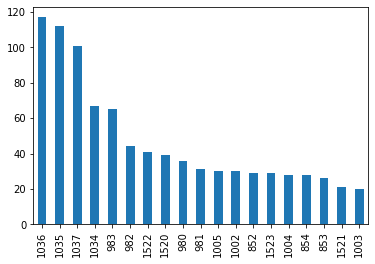

In [ ]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()


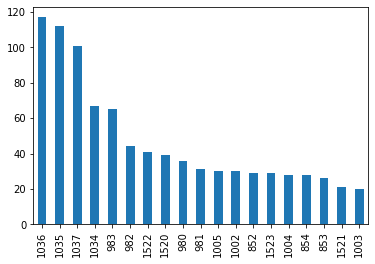

In [ ]:
df["LojaID"].value_counts(ascending=False).plot.bar();

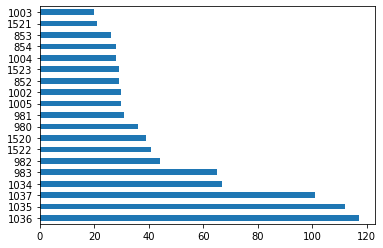

In [ ]:
#Gráfico de barras horizontais
df["LojaID"].value_counts().plot.barh()


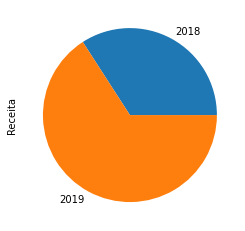

In [ ]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [ ]:
#Total vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

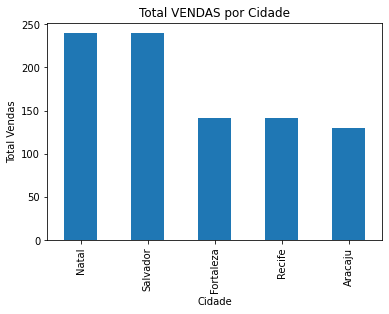

In [ ]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total VENDAS por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

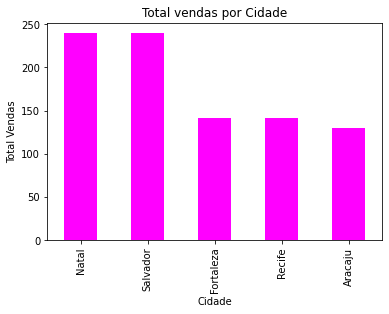

In [ ]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="magenta")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [ ]:
#Alterando o estilo
plt.style.use("ggplot")

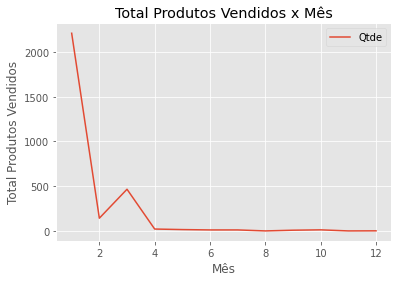

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos Vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]


In [ ]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

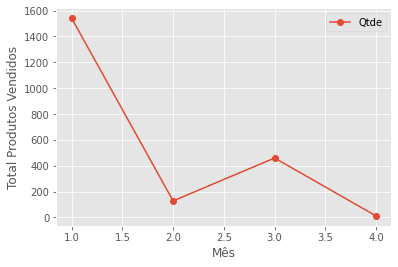

In [ ]:
#Total produtos vendidos por cada mês 
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

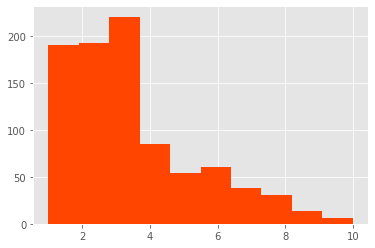

In [ ]:
#Hisograma
plt.hist(df["Qtde"], color="orangered");


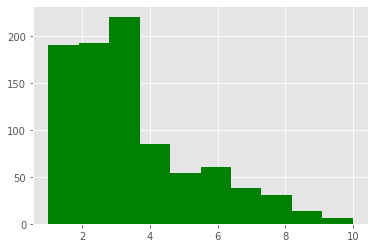

In [ ]:
#Hisograma
plt.hist(df["Qtde"], color="green");

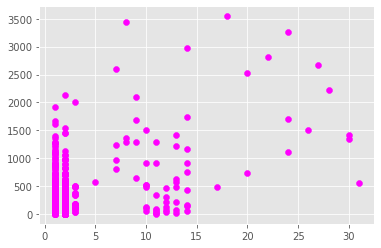

In [ ]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"], color="magenta");

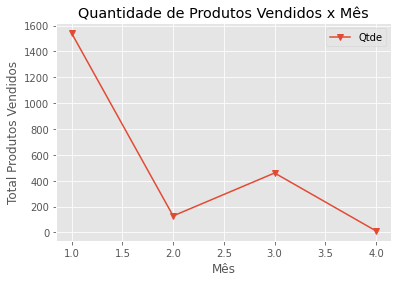

In [ ]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de Produtos Vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")